In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# Global consts for fluid flow
prandtl_number = 10 # ratio of momentum diffusivity and thermal diffusivity
rayleigh_number = 28 # it is the measure of instability in a fluid, mainly caused by convection
beta = 8/3 # measure of compressibility of a fluid ( relative volume change )
# refer "https://mathworld.wolfram.com/LorenzAttractor.html" for complete formulaic breakdown
def lorenzAttractorGenerator(x,y,z):
    # This method of fluid movement, essentially assumes that the fluid is cooled from below and heated from above
    xNot= prandtl_number * (y-x)
    yNot = rayleigh_number * x - y - x*y
    zNot = x * y - beta * z
    return xNot, yNot, zNot

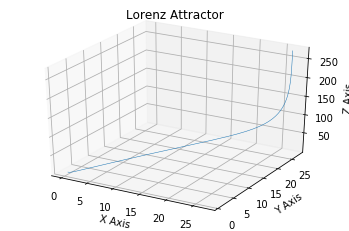

In [6]:
if __name__ == "__main__":
    dt = 0.01
    steps = 100000
    xArr = np.empty(steps + 1)
    yArr = np.empty(steps + 1)
    zArr = np.empty(steps + 1)
    xArr[0], yArr[0], zArr[0] = (0., 1., 1.05)
    for i in range(steps):
        xNot, yNot, zNot = lorenzAttractorGenerator(xArr[i], yArr[i], zArr[i])
        xArr[i + 1] = xArr[i] + (xNot * dt)
        yArr[i + 1] = yArr[i] + (yNot * dt)
        zArr[i + 1] = zArr[i] + (zNot * dt)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(xArr, yArr, zArr, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("Lorenz Attractor")
    plt.show()
    pass




solving the differential equation output using odeint
[ 0.          0.09511554  0.18266806 ... -1.30705777 -1.44182976
 -1.57348999] [ 1.          1.00303864  1.03051687 ... -2.67725576 -2.77039593
 -2.88120164] [ 1.05        1.02284284  0.99732156 ... 19.48895901 19.01296489
 18.55459277]


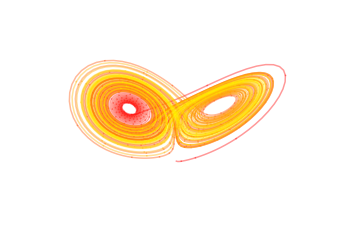

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D 

# Global consts for fluid flow (included in Lorenz equations)
prandtl_number = 10 # AKA. sigma in certain texts, ratio of momentum diffusivity and thermal diffusivity
rayleigh_number = 28 # it is the measure of instability in a fluid, mainly caused by convection
beta = 2.667 # abs(8/3) measure of compressibility of a fluid ( relative volume change )
dt = 100 # max time point
steps = 10000 # total no of time points
# refer "https://mathworld.wolfram.com/LorenzAttractor.html" for complete formulaic breakdown
def lorenzAttractorGenerator(X, t):
    # This method of fluid movement, essentially assumes that the fluid is cooled from below and heated from above
    x, y, z = X
    xBar = -prandtl_number * (x - y)
    yBar = rayleigh_number * x - y - x*z
    zBar = -beta*z + x*y 
    return xBar, yBar, zBar

t = np.linspace(0, dt, steps)
f = odeint(lorenzAttractorGenerator, (0, 1, 1.05), t)
x, y, z = f.T
print("solving the differential equation output using odeint")
print(x,y,z)

fig = plt.figure()
ax = fig.gca(projection='3d')
s = 10
c = np.linspace(0,1,steps)
for i in range(0,steps-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=(1,c[i],0), alpha=0.4)

ax.set_axis_off()
plt.show()

